In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense,Dropout,Input,Flatten,Conv2D

In [3]:
data=tf.keras.datasets.cifar10

In [4]:
(x_train,y_train),(x_test,y_test)=data.load_data()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
y_train.shape

(50000, 1)

In [7]:
#we want our target to be 1d so
y_train, y_test = y_train.flatten(), y_test.flatten()

In [8]:
y_train.shape

(50000,)

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [14]:
#building model

In [11]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),activation='relu',strides=2)(i)
x=Conv2D(64,(3,3),activation='relu',strides=2)(x)
x=Conv2D(128,(3,3),activation='relu',strides=2)(x)
x=Flatten()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(K,activation='softmax')(x)



In [12]:
from tensorflow.keras.models import Model

In [13]:
model=Model(i,x)

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4674 - accuracy: 0.4641 - val_loss: 1.1970 - val_accuracy: 0.5653
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1097 - accuracy: 0.6047 - val_loss: 1.0554 - val_accuracy: 0.6266
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9216 - accuracy: 0.6731 - val_loss: 1.0817 - val_accuracy: 0.6269
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7655 - accuracy: 0.7273 - val_loss: 0.9615 - val_accuracy: 0.6712
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6192 - accuracy: 0.7822 - val_loss: 0.9800 - val_accuracy: 0.6702
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.4739 - accuracy: 0.8321 - val_loss: 1.0440 - val_accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.3462 - accuracy: 0.8774 - val_loss: 1.1826 -

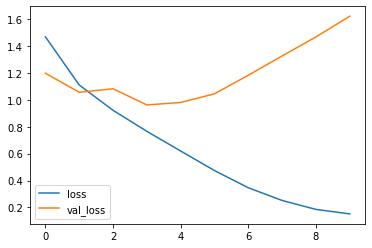

In [16]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

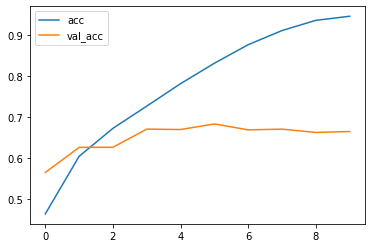

In [18]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
pred=model.predict(x_test).argmax(axis=1)

In [20]:
pred

array([6, 8, 8, ..., 5, 1, 7], dtype=int64)

In [21]:
names = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.80      0.80      0.80      1000
           2       0.66      0.51      0.58      1000
           3       0.45      0.46      0.46      1000
           4       0.54      0.68      0.60      1000
           5       0.54      0.54      0.54      1000
           6       0.74      0.67      0.70      1000
           7       0.71      0.74      0.73      1000
           8       0.77      0.78      0.78      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [24]:
#u can see our prediction very low and we need increase it so we apply data augmentation and batch normalization